In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [4]:
df['date']=pd.to_datetime(df['date'])

### 1. Welche Länder waren die ersten, in denen Frauenteams gegründet wurden?

In [29]:
df2 = df.groupby('home_team')['date'].min().reset_index().set_axis(['team', 'date'], axis=1, inplace=False)
df3 = df.groupby('away_team')['date'].min().reset_index().set_axis(['team', 'date'], axis=1, inplace=False)
df4 = pd.concat([df2, df3])
df4 = df4.groupby('team')['date'].min().reset_index()
df4 = df4.sort_values("date")
df4.head(10)

,team,date
49,Denmark,1969-11-01
66,France,1969-11-01
56,England,1969-11-01
93,Italy,1969-11-01
83,Hong Kong,1975-08-25
10,Australia,1975-08-25
181,Thailand,1975-08-25
132,New Zealand,1975-08-25
163,Singapore,1975-08-27
113,Malaysia,1975-08-27


### 2. Wie hat sich die Anzahl der Frauenfußballteams verändert?
Wie viele Nationen sind in jedem Jahr angetreten?

In [77]:
df_home = df[["date", "home_team"]].set_axis(['date', 'team'], axis=1, inplace=False)
df_away =df[["date", "away_team"]].set_axis(['date', 'team'], axis=1, inplace=False)
df_teams = pd.concat([df_home, df_away])
df_teams['year']=df_teams['date'].dt.year
df_teams.sort_values("date")
teams_by_year = df_teams.groupby("year")["team"].nunique()
teams_by_year

year
1969      4
1975      6
1977      6
1979     12
1980      6
1981      8
1982     15
1983     26
1984      7
1985     16
1986     26
1987     17
1988     17
1989     29
1990     18
1991     45
1992     23
1993     40
1994     41
1995     56
1996     37
1997     23
1998     47
1999     59
2000     54
2001     26
2002     47
2003     67
2004     56
2005     27
2006    100
2007     51
2008     56
2009     34
2010     88
2011     59
2012     76
2013     45
2014     67
2015     66
2016     79
2017     73
2018    119
2019     66
2020     57
2021     92
2022     51
Name: team, dtype: int64

In [45]:
!pip install pycountry-convert

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681896 sha256=3ddc94d952d02cac9e2883280d924aae7ac221021d18530fb6f932d3e7c13810
  Stored in directory: c:\users\bente\appdata\local\pip\cache\wheels\0e\06\e8\7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


In [53]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except(KeyError):
        return "Unknown"
        

df_teams["continent"] = df_teams["team"].apply(country_to_continent)
df_teams.head(20)

,date,team,year,continent
0,1969-11-01,Italy,1969,Europe
1,1969-11-01,Denmark,1969,Europe
2,1969-11-02,England,1969,Unknown
3,1969-11-02,Italy,1969,Europe
4,1975-08-25,Thailand,1975,Asia
5,1975-08-25,Hong Kong,1975,Asia
6,1975-08-27,Thailand,1975,Asia
7,1975-08-27,New Zealand,1975,Oceania
8,1975-08-29,Australia,1975,Oceania
9,1975-08-29,Hong Kong,1975,Asia


### Teams by continent

In [67]:
teams_by_continent = df_teams.groupby(["year", "continent"])["team"].nunique()
teams_by_continent.head()
data = (df_teams.groupby([pd.Grouper(key='year')
                    'continent'])
          .agg(count=('continent','count'))
          .reset_index()
       )
data.head()

,year,continent,count
0,1969,Europe,6
1,1969,Unknown,2
2,1975,Asia,12
3,1975,Oceania,8
4,1977,Asia,20


<AxesSubplot:xlabel='year', ylabel='count'>

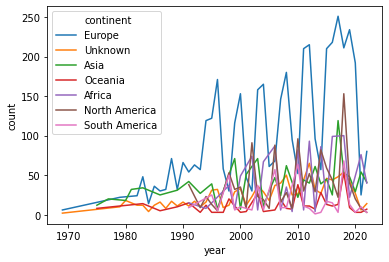

In [68]:
sns.lineplot(x='year', y='count', data=data, hue='continent')

### Visualization on maps

In [54]:
!pip install geopy

In [55]:
from geopy.geocoders import Nominatim

geocoder = Nominatim(user_agent="CSH Project")

place = geocoder.geocode("Germany")
print(place.raw["type"])
print(place)
print(place.point)
print(place.longitude)
print(place.latitude)


C:\Users\Bente\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


administrative
Deutschland
51 9m 49.743s N, 10 26m 52.1927s E
10.4478313
51.1638175


In [69]:
!pip install geopandas

  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0


ERROR: streamlit 1.3.1 has requirement click<8.0,>=7.0, but you'll have click 8.1.3 which is incompatible.


Where to get the polygon of the country?

In [71]:
import geopandas as gpd
country_df = gpd.read_file('geodata/countries.geojson')

C:\Users\Bente\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

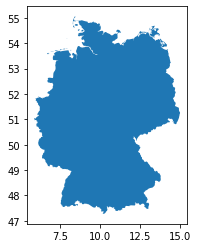

In [73]:
country_df.head()
country_df[country_df.ADMIN=="Germany"].plot()